# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
 
import warnings
warnings.filterwarnings("ignore")
 
#Set all options
%matplotlib inline
plt.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (20, 3)
pd.options.display.float_format = '{:20,.4f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(context="paper",font="monospace")

# User defined functions

In [2]:
def quality_report(df):
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    quality_df = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total', 'Percent', 'Nunique', 'Dtype'])
    display(quality_df)
    
def object_count_plot(df):
    for var in df.columns:
        if df[var].dtype == 'object':
            print(df[var].value_counts())
            plt.figure(figsize=(12,5))
            g = sns.countplot(x=var,data=df)
            g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
            plt.tight_layout()
            plt.show()
            
def numeric_distribution_plot(df):
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of" + col)
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()

# Importing data

In [3]:
train = pd.read_csv('Train (1).csv')
test = pd.read_csv('Test (1).csv')
sub = pd.read_csv('SampleSubmission.csv')

In [4]:
print("Shape of train = ",train.shape)
print("Shape of test = ",test.shape)
print("Shape of Sample sub = ",sub.shape)

Shape of train =  (56000, 52)
Shape of test =  (24000, 51)
Shape of Sample sub =  (24000, 2)


In [5]:
train.sample(5)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
55239,Apcnt_995760,"3,900.0000",0.0066,0.0000,0.0000,0.0000,"1,272,030.0000","15,190,839.0000","12,453,835.0000","95,892,779.0000","91,066,067.0000",nan,"1,258,804.0000","2,064,812.0000",161909580,"346,949,100.0000",0.0000,0.0000,0.0000,0.0000,0.0000,9.7050,nan,nan,0.0000,"5,436.0000","33,216.0000","22,144.0000","60,772.0000","39,510.0000",nan,nan,"4,526.0000",56.8334,0.0000,0.0000,8.0000,34.0000,6.0000,0.0000,nan,nan,0.0000,16.1600,0.6942,0.0000,0.0000,lending,nan,0.0000,0.5923,no
28226,Apcnt_1161608,"3,374.0000",0.7516,1.6366,0.0000,0.0000,nan,"2,411,800.0000",nan,"424,010.0000","3,483,495.0000","970,555.0000",nan,0.0000,16576457,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,0.0000,"18,159.0000",nan,"11,133.0000",nan,9.8334,0.0000,nan,8.0000,nan,4.0000,0.0000,94.1625,nan,0.6417,2.0200,0.4434,0.0000,0.0000,charge,nan,0.0000,0.0256,yes
55912,Apcnt_999504,"3,668.0000",0.0945,0.0000,0.0000,0.0000,"192,166.0000","7,093,415.0000","1,927,495.0000","23,979,905.0000","23,022,576.0000",nan,"6,138,809.0000","6,737,480.0000",77099800,nan,0.0000,0.0000,0.0000,0.0000,0.0000,72.8250,"1,315.0350","1,457.5050",41.6100,"6,052.5000","29,019.0000","18,250.0000","60,772.0000","29,019.0000","7,726.0000",nan,"3,978.0000",39.3334,0.0000,0.0000,22.0000,26.0000,18.0000,0.0000,nan,nan,0.0111,33.3300,0.2737,0.0000,0.0000,lending,"4,664.6244",0.0000,0.3110,no
54418,Apcnt_991232,"3,878.0000",0.0069,0.0000,0.0000,0.0000,"1,150,662.0000","4,869,502.0000","4,206,257.0000","12,798,878.0000","15,160,886.0000",nan,"1,158,053.0000","4,472,722.0000",25442934,nan,0.0000,0.0000,0.0000,0.0000,0.0000,26.6700,0.0000,nan,14.2200,"5,133.0000","19,527.0000","8,638.0000","60,772.0000","23,817.0000",nan,nan,"1,350.0000",24.1666,0.0000,nan,4.0000,8.0000,2.0000,0.0000,nan,nan,0.0000,9.0900,0.5897,nan,0.0000,lending,"1,158,053.0000",0.0000,0.5030,no
26511,Apcnt_1151756,"3,570.0000",0.7407,0.0000,0.0000,0.0000,"399,892.0000","399,892.0000","399,892.0000","3,546,513.0000","399,892.0000",nan,"2,298,601.0000","153,655.0000",28141427,"173,474,550.0000",0.0000,0.0000,0.0000,1.0000,1.0000,127.7850,"12,777.8550","12,777.8550",127.7850,867.0000,549.0000,366.0000,"60,772.0000","12,411.0000","6,874.0000","9,855.0000",114.0000,0.6666,0.0000,0.0000,2.0000,4.0000,2.0000,0.0000,nan,nan,0.0000,1.0100,0.8000,nan,0.0000,lending,179.8753,1.0000,0.1260,no


In [6]:
test.sample(5)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
23754,Apcnt_996620,"3,692.0000",0.1497,0.0000,0.0000,0.0000,"1,790,956.0000","3,854,990.0000","3,854,990.0000","14,764,495.0000","12,794,988.0000",nan,"3,390,524.0000",nan,16576457,"59,752,345.0000",0.0000,0.0000,0.0000,0.0000,0.0000,91.9200,"3,044.3700","3,044.3700",43.8300,"4,288.5000","14,784.0000","9,856.0000","60,772.0000","14,784.0000","9,490.0000",nan,564.0000,29.6666,0.0000,nan,12.0000,4.0000,6.0000,0.0000,nan,nan,0.0000,10.1000,0.5522,0.0000,0.0000,lending,"1,113.3373",0.0000,0.8907
21015,Apcnt_959216,"3,752.0000",nan,0.0000,0.0000,0.0000,"1,736,885.0000","3,016,695.0000","1,736,885.0000","9,675,986.0000","5,807,381.0000",nan,"1,347,107.0000","4,651,273.0000",0,nan,0.0000,0.0000,0.0000,0.0000,0.0000,65.5200,nan,nan,58.2300,"1,734.0000","4,197.0000","2,250.0000","60,772.0000","12,957.0000",nan,"12,501.0000",836.0000,4.3334,0.0000,nan,20.0000,18.0000,0.0000,0.0000,150.5625,nan,0.0000,13.1300,0.3684,0.0000,0.0000,lending,nan,0.0000,nan
16705,Apcnt_1221832,"3,492.0000",2.0629,0.0000,0.0000,0.0000,0.0000,"1,685,537.0000","906,370.0000","5,444,055.0000","5,917,857.0000",nan,"4,125,734.0000","2,291,988.0000",34694910,nan,0.0000,0.0000,0.0000,1.0000,1.0000,122.8800,"6,654.9150","6,822.1200",7.8750,411.0000,"1,824.0000","1,216.0000","2,494.0000","9,033.0000","4,866.0000",nan,144.0000,2.5000,0.0000,0.0000,12.0000,0.0000,30.0000,0.0000,nan,146.8605,0.0733,14.1400,0.3605,nan,0.0000,charge,619.8598,1.0000,0.1569
18994,Apcnt_932140,"3,478.0000",0.0000,0.0000,0.0000,0.0000,nan,"1,448,247.0000",nan,"32,073,439.0000","1,756,724.0000",nan,0.0000,0.0000,46259880,"75,172,305.0000",0.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,nan,0.0000,"5,415.0000","1,185.0000",nan,"3,528.0000","27,102.0000","8,090.0000",nan,"2,374.0000",8.3334,0.0000,nan,2.0000,20.0000,4.0000,0.0000,nan,nan,0.2655,2.0200,0.8000,0.0000,0.0000,lending,0.0000,0.0000,0.6933
15290,Apcnt_1203228,"3,842.0000",0.0231,0.0000,0.0000,0.0000,"192,944.0000","7,250,960.0000","3,190,967.0000","2,312,994.0000","2,153,893.0000",nan,"245,070.0000","1,325,712.0000",9637475,nan,0.0000,0.0000,0.0000,0.0000,0.0000,6.5850,371.6700,0.0000,10.3200,882.0000,"2,373.0000","1,582.0000","60,772.0000","3,468.0000",nan,nan,116.0000,3.8334,0.0000,0.0000,2.0000,0.0000,4.0000,0.0000,nan,nan,nan,1.0100,0.7587,nan,0.0000,charge,657.6059,0.0000,0.2400


In [7]:
train.describe(include='all')

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
count,56000,"53,471.0000","52,156.0000","55,645.0000","55,645.0000","55,645.0000","42,640.0000","50,837.0000","42,640.0000","47,992.0000","55,645.0000","24,579.0000","46,105.0000","50,111.0000","56,000.0000","33,525.0000","42,964.0000","44,849.0000","45,598.0000","55,996.0000","55,645.0000","40,146.0000","35,600.0000","27,877.0000","42,703.0000","50,550.0000","48,562.0000","46,701.0000","55,645.0000","55,645.0000","30,491.0000","16,592.0000","50,550.0000","54,744.0000","55,645.0000","32,852.0000","54,005.0000","50,550.0000","55,645.0000","51,789.0000","12,271.0000","17,771.0000","54,677.0000","55,432.0000","50,617.0000","24,683.0000","40,096.0000",56000,"35,111.0000","55,645.0000","44,944.0000",56000
unique,56000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2,nan,nan,nan,2
top,Apcnt_1175956,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,charge,nan,nan,nan,no
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,36373,nan,nan,nan,42285
mean,NaN,"3,491.7957",0.5507,1.0522,0.8520,1.9563,"624,447.9244","6,865,210.3847","2,626,690.1776","13,160,015.4373","11,855,849.9738","2,054,714.7603","2,771,112.6303","6,009,944.1236","69,148,750.4968","114,504,142.6083",0.2304,0.2657,0.2718,0.9488,1.0316,86.5004,"6,628.3164","6,452.8751",104.5585,"2,624.5559","10,106.5549","6,190.5169","17,274.3151","16,518.5407","5,213.2467","10,857.5658",938.3453,13.9266,0.2302,0.1999,12.8591,8.4804,8.6014,0.0908,147.7980,108.1174,0.3682,6.6345,0.5634,0.0725,0.0954,NaN,"305,244.9328",1.0491,"600,586.1729",NaN
std,NaN,188.4624,0.8210,2.1478,3.1577,10.5124,"1,433,421.5447","19,127,287.2822","3,927,354.7528","19,779,632.5497","26,694,592.8838","4,912,980.2014","4,544,838.3010","23,358,934.0839","2,713,995,026.8743","115,384,236.0283",0.6218,0.7202,0.7254,1.7365,1.7851,53.4455,"5,661.0593","5,739.9688",436.6707,"1,964.2265","8,796.4725","5,390.9153","26,930.7420","9,666.1840","3,124.4915","6,049.6785","1,044.5970",15.2084,0.6831,0.5740,10.6220,9.3288,7.9692,0.4238,45.0859,36.7658,0.4129,6.3789,0.1970,0.2911,0.3352,NaN,"1,647,757.4141",1.8062,"5,842,404.6322",NaN
min,NaN,"2,990.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"539,543.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.2550,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1666,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0210,0.0000,0.0000,0.0000,0.0485,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,NaN
25%,NaN,"3,358.0000",0.0708,0.0000,0.0000,0.0000,"14,004.0000","686,974.0000","192,944.0000","1,368,502.0000","450,073.0000","217,256.5000","275,801.0000","192,166.0000","16,576,457.0000","50,076,359.0000",0.0000,0.0000,0.0000,0.0000,0.0000,40.3050,"1,068.6675",797.1450,14.8650,"1,231.5000","3,375.0000","2,068.0000",60.0000,"9,765.0000","2,312.0000","6,297.0000",194.0000,2.3334,0.0000,0.0000,6.0000,2.0000,4.0000,0.0000,136.1918,87.0555,0.0000,2.0200,0.4117,0.0000,0.0000,NaN,77

In [8]:
train.isnull().sum()/len(train)*100

Applicant_ID                   0.0000
form_field1                    4.5161
form_field2                    6.8643
form_field3                    0.6339
form_field4                    0.6339
form_field5                    0.6339
form_field6                   23.8571
form_field7                    9.2196
form_field8                   23.8571
form_field9                   14.3000
form_field10                   0.6339
form_field11                  56.1089
form_field12                  17.6696
form_field13                  10.5161
form_field14                   0.0000
form_field15                  40.1339
form_field16                  23.2786
form_field17                  19.9125
form_field18                  18.5750
form_field19                   0.0071
form_field20                   0.6339
form_field21                  28.3107
form_field22                  36.4286
form_field23                  50.2196
form_field24                  23.7446
form_field25                   9.7321
form_field26

In [9]:
train.drop(["form_field31","form_field40","form_field41","form_field11","form_field23","form_field45"], axis=1, inplace=True)

In [10]:
train.fillna(-99999, inplace=True)

In [11]:
train.isnull().sum()

Applicant_ID      0
form_field1       0
form_field2       0
form_field3       0
form_field4       0
form_field5       0
form_field6       0
form_field7       0
form_field8       0
form_field9       0
form_field10      0
form_field12      0
form_field13      0
form_field14      0
form_field15      0
form_field16      0
form_field17      0
form_field18      0
form_field19      0
form_field20      0
form_field21      0
form_field22      0
form_field24      0
form_field25      0
form_field26      0
form_field27      0
form_field28      0
form_field29      0
form_field30      0
form_field32      0
form_field33      0
form_field34      0
form_field35      0
form_field36      0
form_field37      0
form_field38      0
form_field39      0
form_field42      0
form_field43      0
form_field44      0
form_field46      0
form_field47      0
form_field48      0
form_field49      0
form_field50      0
default_status    0
dtype: int64

In [12]:
test.describe(include='all')

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
count,24000,"22,890.0000","22,291.0000","23,854.0000","23,854.0000","23,854.0000","18,396.0000","21,769.0000","18,396.0000","20,600.0000","23,853.0000","10,602.0000","19,817.0000","21,537.0000","24,000.0000","14,408.0000","18,526.0000","19,305.0000","19,631.0000","24,000.0000","23,853.0000","17,293.0000","15,276.0000","11,875.0000","18,395.0000","21,744.0000","20,828.0000","20,090.0000","23,853.0000","23,853.0000","13,092.0000","7,190.0000","21,744.0000","23,505.0000","23,853.0000","14,134.0000","23,097.0000","21,744.0000","23,853.0000","22,171.0000","5,172.0000","7,651.0000","23,422.0000","23,750.0000","21,638.0000","10,462.0000","17,115.0000",24000,"15,078.0000","23,854.0000","19,203.0000"
unique,24000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2,nan,nan,nan
top,Apcnt_1119380,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,charge,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,15467,nan,nan,nan
mean,NaN,"3,492.2844",0.5577,1.0654,0.8591,2.1835,"626,303.6180","6,797,032.8104","2,654,142.2210","13,505,929.4608","11,874,783.4098","2,132,302.3993","2,772,047.2722","5,984,000.0227","92,918,621.4093","114,148,289.1087",0.2343,0.2677,0.2725,0.9385,1.0205,87.1141,"6,653.1895","6,473.0261",105.9344,"2,626.3580","10,109.2556","6,199.3050","17,715.5462","16,507.9141","5,248.2472","10,934.0161",946.7119,14.1481,0.2297,0.1941,12.7772,8.5545,8.5062,0.0907,147.6233,108.2096,0.3697,6.5805,0.5662,0.0665,0.0979,NaN,"301,544.0018",1.0641,"674,984.3493"
std,NaN,190.5028,0.8265,2.1984,3.4031,11.4157,"1,457,539.7006","16,260,216.8188","3,968,184.7915","22,891,247.8669","24,771,131.7122","5,733,605.2904","4,794,094.8958","19,476,502.1025","3,768,364,256.0723","119,401,701.1536",0.6225,0.7012,0.7068,1.7053,1.7573,53.1791,"5,701.1183","5,929.9622",479.9039,"1,946.8459","8,787.5322","5,388.3876","27,153.4594","9,672.2967","3,138.1833","6,168.9078","1,057.9859",15.5114,0.6715,0.5585,10.4511,9.4691,7.8339,0.4086,43.5803,36.4263,0.4141,6.3631,0.1961,0.2782,0.3704,NaN,"1,868,574.3808",1.8168,"6,561,030.7610"
min,NaN,"2,986.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"1,811,573.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.4050,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1666,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0750,0.0000,0.0000,0.0000,0.0664,0.0000,0.0000,NaN,0.0000,0.0000,0.0000
25%,NaN,"3,356.0000",0.0687,0.0000,0.0000,0.0000,"14,004.0000","672,581.0000","181,663.0000","1,349,441.0000","420,898.0000","203,933.2500","271,522.0000","200,724.0000","16,576,457.0000","49,525,437.7500",0.0000,0.0000,0.0000,0.0000,0.0000,40.5450,"1,140.9337",858.1575,14.7300,"1,231.5000","3,375.0000","2,068.0000",60.0000,"9,765.0000","2,312.0000","6,297.0000",194.0000,2.5000,0.0000,0.0000,6.0000,2.0000,4.0000,0.0000,135.5317,87.4995,0.0000,2.0200,0.4133,0.0000,0.0000,NaN,72.7236,0.0000,0.0450
50%,NaN,"3,484.0000",0.27

In [13]:
test.isnull().sum()/len(test)*100

Applicant_ID                 0.0000
form_field1                  4.6250
form_field2                  7.1208
form_field3                  0.6083
form_field4                  0.6083
form_field5                  0.6083
form_field6                 23.3500
form_field7                  9.2958
form_field8                 23.3500
form_field9                 14.1667
form_field10                 0.6125
form_field11                55.8250
form_field12                17.4292
form_field13                10.2625
form_field14                 0.0000
form_field15                39.9667
form_field16                22.8083
form_field17                19.5625
form_field18                18.2042
form_field19                 0.0000
form_field20                 0.6125
form_field21                27.9458
form_field22                36.3500
form_field23                50.5208
form_field24                23.3542
form_field25                 9.4000
form_field26                13.2167
form_field27                

In [14]:
test.drop(["form_field31","form_field40","form_field41","form_field11","form_field23","form_field45"], axis=1, inplace=True)

In [15]:
test.fillna(-99999, inplace=True)

In [16]:
test.isnull().sum()

Applicant_ID    0
form_field1     0
form_field2     0
form_field3     0
form_field4     0
form_field5     0
form_field6     0
form_field7     0
form_field8     0
form_field9     0
form_field10    0
form_field12    0
form_field13    0
form_field14    0
form_field15    0
form_field16    0
form_field17    0
form_field18    0
form_field19    0
form_field20    0
form_field21    0
form_field22    0
form_field24    0
form_field25    0
form_field26    0
form_field27    0
form_field28    0
form_field29    0
form_field30    0
form_field32    0
form_field33    0
form_field34    0
form_field35    0
form_field36    0
form_field37    0
form_field38    0
form_field39    0
form_field42    0
form_field43    0
form_field44    0
form_field46    0
form_field47    0
form_field48    0
form_field49    0
form_field50    0
dtype: int64

# Checking target distribution

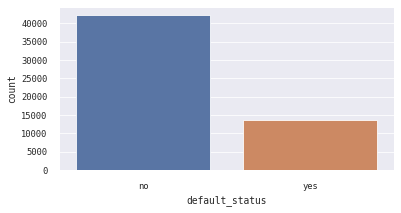

In [17]:
plt.figure(figsize=(6,3))
sns.countplot(x='default_status',data=train)
plt.show()

In [18]:
train['default_status'].value_counts(normalize = True) * 100

no                 75.5089
yes                24.4911
Name: default_status, dtype: float64

# Checking data quality

In [19]:
#checking missing data
quality_report(train)

,Total,Percent,Nunique,Dtype
default_status,0,0.0000,2,object
form_field12,0,0.0000,16779,float64
form_field21,0,0.0000,11102,float64
form_field20,0,0.0000,28,float64
form_field19,0,0.0000,27,float64
form_field18,0,0.0000,17,float64
form_field17,0,0.0000,16,float64
form_field16,0,0.0000,12,float64
form_field15,0,0.0000,23784,float64
form_field14,0,0.0000,1237,int64


In [20]:
train['form_field47'].value_counts()

charge     36373
lending    19627
Name: form_field47, dtype: int64

# Feature Transformation

In [21]:
from scipy.stats import skew,norm #for some statistics

In [22]:
numeric = train.select_dtypes(include='number').columns
skew_features = train[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 11 numerical features with Skew > 0.5 :


form_field14               118.5443
form_field13                56.2098
form_field7                 37.7734
form_field10                18.0378
form_field50                17.2244
form_field48                13.2222
form_field6                  6.8682
form_field15                 5.2120
form_field12                 5.0152
form_field8                  4.2731
dtype: float64

In [23]:
skew_index

Index(['form_field14', 'form_field13', 'form_field7', 'form_field10',
       'form_field50', 'form_field48', 'form_field6', 'form_field15',
       'form_field12', 'form_field8', 'form_field9'],
      dtype='object')

In [24]:
#Normalize skewed features using log transformation
for column in skew_index:
    train[column] = np.log1p(train[column])

In [25]:
numeric_test = test.select_dtypes(include='number').columns
skew_features = test[numeric_test].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew_test = skew_features[skew_features > 0.5]
skew_indextest = high_skew_test.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew_test.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew_test})
skew_features.head(10)

There are 12 numerical features with Skew > 0.5 :


form_field14                87.2641
form_field48                29.6932
form_field13                27.7491
form_field50                17.3774
form_field9                 14.7709
form_field7                 13.4747
form_field6                  8.0173
form_field10                 7.7274
form_field12                 7.5723
form_field15                 6.6523
dtype: float64

In [26]:
#Normalize skewed features using log transformation
for column in skew_indextest:
    test[column] = np.log1p(test[column])

In [27]:
train.drop(['Applicant_ID'], inplace=True, axis=1)
test.drop(['Applicant_ID'], inplace=True, axis=1)

In [28]:
for column in train:
    if column not in skew_index:
        print(column)

form_field1
form_field2
form_field3
form_field4
form_field5
form_field16
form_field17
form_field18
form_field19
form_field20
form_field21
form_field22
form_field24
form_field25
form_field26
form_field27
form_field28
form_field29
form_field30
form_field32
form_field33
form_field34
form_field35
form_field36
form_field37
form_field38
form_field39
form_field42
form_field43
form_field44
form_field46
form_field47
form_field49
default_status


In [29]:
for i in numeric:
    if i not in skew_index:
        print(i)

form_field1
form_field2
form_field3
form_field4
form_field5
form_field16
form_field17
form_field18
form_field19
form_field20
form_field21
form_field22
form_field24
form_field25
form_field26
form_field27
form_field28
form_field29
form_field30
form_field32
form_field33
form_field34
form_field35
form_field36
form_field37
form_field38
form_field39
form_field42
form_field43
form_field44
form_field46
form_field49


In [30]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
sc = StandardScaler()
for i in numeric:
    if i not in skew_index:
        sc.fit_transform(train[[i]])

In [31]:
train = train.replace('nan', -99999)

In [32]:
train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field42,form_field43,form_field44,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,"3,436.0000",0.2851,1.6560,0.0000,0.0000,0.0000,16.1848,12.4375,15.2678,16.2432,14.6490,15.8793,18.3838,18.5356,1.0000,1.0000,1.0000,3.0000,3.0000,134.6550,"-99,999.0000",134.6550,"4,000.5000","17,064.0000","11,376.0000",60.0000,"17,064.0000","5,962.0000","1,052.0000",8.0000,2.0000,"-99,999.0000",12.0000,12.0000,4.0000,0.0000,0.3929,2.0200,0.7116,0.0000,charge,nan,1.1295,0.0434,no
1,"3,456.0000",0.6740,0.2342,0.0000,0.0000,0.0000,13.7090,13.1174,16.0209,14.7450,15.1975,14.5770,17.1528,17.6259,1.0000,1.0000,1.0000,2.0000,2.0000,109.2300,"11,385.2400",86.6850,"4,161.0000","13,413.0000","8,942.0000",304.0000,"13,413.0000","5,780.0000","2,554.0000",17.5000,0.0000,0.0000,16.0000,24.0000,8.0000,0.0000,0.3143,8.0800,0.1836,0.0000,charge,5.8602,1.6205,0.2795,no
2,"3,276.0000",0.5384,3.1510,0.0000,6.2820,nan,13.7715,nan,12.1702,13.8923,nan,0.0000,16.6235,16.9269,"-99,999.0000","-99,999.0000","-99,999.0000",0.0000,0.0000,"-99,999.0000","-99,999.0000","-99,999.0000","1,597.5000","4,746.0000","3,164.0000",60.0000,"15,696.0000","-99,999.0000",70.0000,0.6666,0.0000,"-99,999.0000",12.0000,0.0000,6.0000,0.0000,0.1630,18.1800,0.7911,0.0000,charge,nan,1.5134,0.0116,yes
3,"3,372.0000",0.1701,0.5050,0.0000,0.0000,12.1661,14.9289,12.8623,15.1984,15.1025,13.5565,13.9868,17.6906,18.7304,0.0000,0.0000,0.0000,1.0000,1.0000,120.1200,"8,580.0000",85.8000,"1,701.0000","4,014.0000","2,676.0000",60.0000,"11,679.0000","-99,999.0000",522.0000,7.8334,1.0000,1.0000,4.0000,8.0000,4.0000,1.0000,0.4889,2.0200,0.6852,0.0000,charge,4.5102,0.6645,0.0795,no
4,"3,370.0000",0.7727,1.1010,0.0000,0.0000,7.3505,12.2771,12.2771,14.0656,12.7988,13.6152,13.1452,17.1528,16.5429,0.0000,0.0000,0.0000,3.0000,3.0000,104.5350,"8,360.1900",115.3350,"1,551.0000","3,285.0000","2,190.0000",60.0000,"19,437.0000","12,958.0000",272.0000,1.0000,0.0000,0.0000,24.0000,2.0000,24.0000,0.0000,0.2750,12.1200,0.4382,0.0000,charge,4.5940,1.4279,0.0446,no


In [33]:
product = {'charge':1, 'lending':0}
default = {'yes':1, 'no':0}
train['default_status'].replace(default, inplace=True)
train['form_field47'].replace(product, inplace=True)

In [34]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field42,form_field43,form_field44,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
count,"56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","42,640.0000","50,837.0000","42,640.0000","47,992.0000","55,645.0000","46,105.0000","50,111.0000","56,000.0000","33,525.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","56,000.0000","35,111.0000","56,000.0000","44,944.0000","56,000.0000"
mean,"-1,181.9226","-6,863.7041",-632.8767,-633.0757,-631.9783,10.0004,14.0131,13.0558,15.2265,13.2051,12.8557,11.9729,16.7364,18.2122,"-23,278.1619","-19,912.0881","-18,574.5929",-6.1941,-632.8972,"-28,248.4197","-32,214.4917","-23,664.6739","-7,362.9151","-4,517.8222","-11,442.6316","16,530.8861","15,779.9027","-42,712.8105","-8,885.0213","-2,229.2205",-633.6934,"-41,335.1837","-3,550.0634","-9,724.3904",-625.3753,"-7,519.4836","-2,362.1169","-1,007.7084","-9,611.8947","-28,399.6477",0.6495,6.2054,-632.8798,0.6924,0.2449
std,"21,491.5179","25,284.6955","7,936.7617","7,936.7462","7,936.8401",4.9113,3.3786,3.3045,2.0484,5.4037,4.0498,5.8195,2.8570,0.8621,"42,260.7342","39,934.2885","38,890.5433",845.1330,"7,936.7600","45,089.7473","51,510.7811","42,597.9594","30,474.5703","38,255.4308","39,821.9980","28,413.0317","13,355.2616","52,448.6951","29,934.0440","14,809.3260","7,936.6962","49,243.6255","18,537.7002","29,641.9784","7,937.3646","26,370.7988","15,187.8174","10,020.6259","29,476.3935","45,093.6750",0.4771,3.3452,"7,936.7614",2.5701,0.4300
min,"-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,13.1985,"-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000",0.0000,0.0000,"-99,999.0000",0.0000,0.0000
25%,"3,336.0000",0.0477,0.0000,0.0000,0.0000,9.5472,13.4401,12.1702,14.1292,13.0172,12.5274,12.1661,16.6235,17.7291,0.0000,0.0000,0.0000,0.0000,0.0000,"-99,999.0000","-99,999.0000",0.0000,889.5000,"1,734.0000",730.0000,60.0000,"9,672.0000","-99,999.0000",112.0000,2.1666,0.0000,"-99,999.0000",6.0000,0.0000,4.0000,0.0000,0.0000,2.0200,0.3491,"-99,999.0000",0.0000,4.3580,0.0000,0.0446,0.0000
50%,"3,474.0000",0.2267,0.0600,0.0000,0.0000,11.6573,14.8104,13.7788,15.5214,15.1259,13.9666,14.2891,17.1528,18.2514,0.0000,0.0000,0.0000,0.0000,0.0000,50.7750,596.3625,29.8350,"1,987.5000","6,480.0000","3,528.0000",426.0000,"14,964.0000",670.0000,488.0000,7.3334,0.0000,0.0000,10.0000,4.0000,6.0000,0.0000,0.2062,5.0500,0.5481,0.0000,1.0000,5.7656,0.0000,0.1573,0.0000
75%,"3,610.0000",0.6757,1.2708,0.0000,0.0000,13.1729,15.7605,15.1377,16.6455,16.4003,15.0275,15.5371,17.6906,18.7775,0.0000,0.0000,0.0000,1.0000,1.0000,115.2900,"8,220.1012",96.8700,"3,330.0000","12,774.0000","7,666.0000","60,772.0000","21,717.0000","6,022.0000","1,230.0000",20.8334,0.0000,0.0000,16.0000,12.0000,12.0000,0.0000,0.6111,10.1000,0.7395,0.0000,1.0000,7.0510,1.1585,0.4050,0

In [35]:
sc = StandardScaler()
for i in numeric_test:
    if i not in skew_indextest:
        sc.fit_transform(test[[i]])

In [36]:
test = test.replace('nan', -99999)

In [37]:
test.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field42,form_field43,form_field44,form_field46,form_field47,form_field48,form_field49,form_field50
0,"3,236.0000",0.3488,10.2006,0.0000,0.0000,12.9446,12.9446,12.9446,13.2006,0.0000,8.6028,0.0000,17.6906,18.5577,0.0000,0.0000,0.0000,0.0000,0.0000,"-99,999.0000","-99,999.0000","-99,999.0000","1,086.0000","6,204.0000","2,676.0000",60.0000,"14,691.0000","9,794.0000",238.0000,1.8334,0.0000,"-99,999.0000",22.0000,2.0000,14.0000,0.0000,0.8250,1.0100,0.8000,0.0000,charge,nan,0.0000,0.0112
1,"3,284.0000",1.2736,2.9606,9.0198,0.0000,0.0000,16.1039,10.7999,14.2277,16.7229,13.8410,14.1495,17.3621,18.2869,1.0000,1.0000,1.0000,1.0986,2.0000,142.5600,"-99,999.0000",570.5850,"3,082.5000","10,221.0000","6,814.0000",60.0000,"11,955.0000","3,528.0000","1,216.0000",19.5000,3.0000,"-99,999.0000",30.0000,18.0000,14.0000,2.0000,0.5077,4.0400,0.6232,0.0000,lending,nan,0.5050,0.0426
2,"-99,999.0000",0.2751,0.0600,0.0000,0.0000,nan,nan,nan,nan,0.0000,nan,nan,16.9053,nan,"-99,999.0000","-99,999.0000","-99,999.0000",0.0000,0.0000,"-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000","-99,999.0000",852.0000,"4,836.0000","-99,999.0000","-99,999.0000",7.8334,0.0000,"-99,999.0000",2.0000,"-99,999.0000",0.0000,"-99,999.0000","-99,999.0000",0.0000,"-99,999.0000","-99,999.0000",charge,nan,0.0000,nan
3,"3,232.0000",0.2851,2.8032,0.0000,0.0000,0.0000,13.0685,13.0685,14.3604,13.1096,13.9782,14.0146,16.6235,nan,2.0000,2.0000,2.0000,1.3863,3.0000,109.0050,"13,050.0000",109.0050,"1,414.5000","4,197.0000","2,798.0000",60.0000,"14,964.0000","-99,999.0000",248.0000,9.0000,1.0000,1.0000,36.0000,0.0000,26.0000,0.0000,0.9167,2.0200,0.4642,"-99,999.0000",charge,4.5127,0.7888,0.0990
4,"3,466.0000",2.0955,0.8318,2.5182,0.0000,9.8955,13.9558,13.9558,15.8774,15.5652,13.3262,15.3799,17.6906,18.0929,0.0000,0.0000,0.0000,1.3863,3.0000,139.0650,469.2900,15.1800,"2,724.0000","9,855.0000","6,570.0000",182.0000,"11,679.0000","5,900.0000","2,388.0000",16.6666,1.0000,0.0000,24.0000,28.0000,20.0000,0.0000,0.2340,23.2300,0.7267,0.0000,lending,7.1736,1.6377,0.1511


In [38]:
test['form_field47'].replace(product, inplace=True)

In [39]:
features = train.select_dtypes(exclude=object).columns.drop(['default_status'])
for col in features:
    train[col].fillna(-99999, inplace=True)
    test[col].fillna(-99999, inplace=True)

In [40]:
train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field42,form_field43,form_field44,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,"3,436.0000",0.2851,1.6560,0.0000,0.0000,0.0000,16.1848,12.4375,15.2678,16.2432,14.6490,15.8793,18.3838,18.5356,1.0000,1.0000,1.0000,3.0000,3.0000,134.6550,"-99,999.0000",134.6550,"4,000.5000","17,064.0000","11,376.0000",60.0000,"17,064.0000","5,962.0000","1,052.0000",8.0000,2.0000,"-99,999.0000",12.0000,12.0000,4.0000,0.0000,0.3929,2.0200,0.7116,0.0000,1,"-99,999.0000",1.1295,0.0434,0
1,"3,456.0000",0.6740,0.2342,0.0000,0.0000,0.0000,13.7090,13.1174,16.0209,14.7450,15.1975,14.5770,17.1528,17.6259,1.0000,1.0000,1.0000,2.0000,2.0000,109.2300,"11,385.2400",86.6850,"4,161.0000","13,413.0000","8,942.0000",304.0000,"13,413.0000","5,780.0000","2,554.0000",17.5000,0.0000,0.0000,16.0000,24.0000,8.0000,0.0000,0.3143,8.0800,0.1836,0.0000,1,5.8602,1.6205,0.2795,0
2,"3,276.0000",0.5384,3.1510,0.0000,6.2820,"-99,999.0000",13.7715,"-99,999.0000",12.1702,13.8923,"-99,999.0000",0.0000,16.6235,16.9269,"-99,999.0000","-99,999.0000","-99,999.0000",0.0000,0.0000,"-99,999.0000","-99,999.0000","-99,999.0000","1,597.5000","4,746.0000","3,164.0000",60.0000,"15,696.0000","-99,999.0000",70.0000,0.6666,0.0000,"-99,999.0000",12.0000,0.0000,6.0000,0.0000,0.1630,18.1800,0.7911,0.0000,1,"-99,999.0000",1.5134,0.0116,1
3,"3,372.0000",0.1701,0.5050,0.0000,0.0000,12.1661,14.9289,12.8623,15.1984,15.1025,13.5565,13.9868,17.6906,18.7304,0.0000,0.0000,0.0000,1.0000,1.0000,120.1200,"8,580.0000",85.8000,"1,701.0000","4,014.0000","2,676.0000",60.0000,"11,679.0000","-99,999.0000",522.0000,7.8334,1.0000,1.0000,4.0000,8.0000,4.0000,1.0000,0.4889,2.0200,0.6852,0.0000,1,4.5102,0.6645,0.0795,0
4,"3,370.0000",0.7727,1.1010,0.0000,0.0000,7.3505,12.2771,12.2771,14.0656,12.7988,13.6152,13.1452,17.1528,16.5429,0.0000,0.0000,0.0000,3.0000,3.0000,104.5350,"8,360.1900",115.3350,"1,551.0000","3,285.0000","2,190.0000",60.0000,"19,437.0000","12,958.0000",272.0000,1.0000,0.0000,0.0000,24.0000,2.0000,24.0000,0.0000,0.2750,12.1200,0.4382,0.0000,1,4.5940,1.4279,0.0446,0


In [41]:
X = train[features]
y = train['default_status']
 
print(len(X), len(y))

56000 56000


In [42]:
X.columns
 
print(test.columns)

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field12', 'form_field13',
       'form_field14', 'form_field15', 'form_field16', 'form_field17',
       'form_field18', 'form_field19', 'form_field20', 'form_field21',
       'form_field22', 'form_field24', 'form_field25', 'form_field26',
       'form_field27', 'form_field28', 'form_field29', 'form_field30',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field42', 'form_field43', 'form_field44', 'form_field46',
       'form_field47', 'form_field48', 'form_field49', 'form_field50'],
      dtype='object')


# Modelling

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [45]:
lr = LogisticRegression()
rf = RandomForestClassifier()
gbm = GradientBoostingClassifier()
decision_tree = DecisionTreeClassifier()

In [46]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gbm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
print('LogisticRegression AUC: {}'. format(roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])))
print('RandomForestClassifier AUC: {}'. format(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])))
print('GradientBoostingClassifier AUC: {}'. format(roc_auc_score(y_test, gbm.predict_proba(X_test)[:, 1])))
print('DecisionTreeClassifier AUC: {}'. format(roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])))

LogisticRegression AUC: 0.7545096968772148
RandomForestClassifier AUC: 0.8305578955008491
GradientBoostingClassifier AUC: 0.8360956109694455
DecisionTreeClassifier AUC: 0.6362477621279273


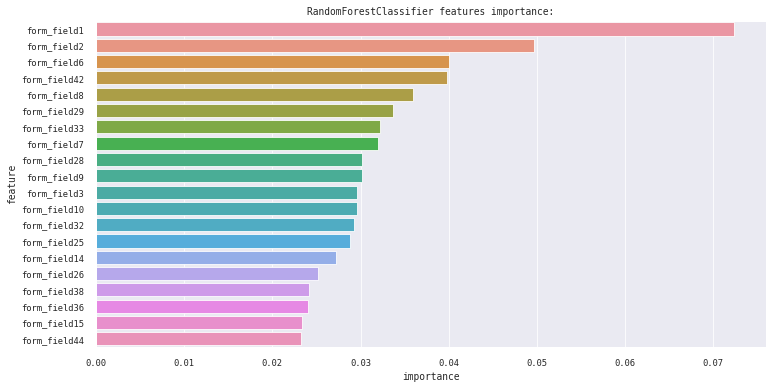

In [48]:
feature_importance_df = pd.DataFrame(rf.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns
 
plt.figure(figsize=(12,6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(20))
plt.title('RandomForestClassifier features importance:');

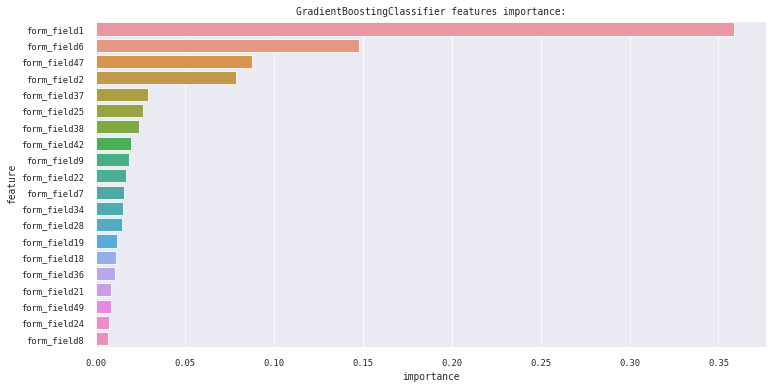

In [49]:
feature_importance_df = pd.DataFrame(gbm.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns
 
plt.figure(figsize=(12,6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(20))
plt.title('GradientBoostingClassifier features importance:');

# Predicting on the test 

In [50]:
test.columns

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field12', 'form_field13',
       'form_field14', 'form_field15', 'form_field16', 'form_field17',
       'form_field18', 'form_field19', 'form_field20', 'form_field21',
       'form_field22', 'form_field24', 'form_field25', 'form_field26',
       'form_field27', 'form_field28', 'form_field29', 'form_field30',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field42', 'form_field43', 'form_field44', 'form_field46',
       'form_field47', 'form_field48', 'form_field49', 'form_field50'],
      dtype='object')

In [51]:
prediction = gbm.predict_proba(test)[:, 1]

In [52]:
from catboost import CatBoostClassifier

In [53]:
Cat = CatBoostClassifier ()

In [54]:
Cat.fit(X_train, y_train)

Learning rate set to 0.049348
0:	learn: 0.6605786	total: 360ms	remaining: 5m 59s
1:	learn: 0.6339140	total: 728ms	remaining: 6m 3s
2:	learn: 0.6106728	total: 996ms	remaining: 5m 30s
3:	learn: 0.5898969	total: 1.15s	remaining: 4m 46s
4:	learn: 0.5721015	total: 1.31s	remaining: 4m 20s
5:	learn: 0.5559075	total: 1.46s	remaining: 4m 2s
6:	learn: 0.5420467	total: 1.62s	remaining: 3m 49s
7:	learn: 0.5302783	total: 1.74s	remaining: 3m 35s
8:	learn: 0.5197743	total: 1.87s	remaining: 3m 25s
9:	learn: 0.5101886	total: 2s	remaining: 3m 18s
10:	learn: 0.5013572	total: 2.15s	remaining: 3m 13s
11:	learn: 0.4934568	total: 2.27s	remaining: 3m 7s
12:	learn: 0.4864206	total: 2.42s	remaining: 3m 3s
13:	learn: 0.4807083	total: 2.54s	remaining: 2m 58s
14:	learn: 0.4756892	total: 2.67s	remaining: 2m 55s
15:	learn: 0.4708584	total: 2.81s	remaining: 2m 52s
16:	learn: 0.4666858	total: 2.95s	remaining: 2m 50s
17:	learn: 0.4625729	total: 3.07s	remaining: 2m 47s
18:	learn: 0.4588138	total: 3.23s	remaining: 2m 46s

158:	learn: 0.3976821	total: 26.7s	remaining: 2m 21s
159:	learn: 0.3975998	total: 27s	remaining: 2m 21s
160:	learn: 0.3974537	total: 27.1s	remaining: 2m 21s
161:	learn: 0.3973803	total: 27.3s	remaining: 2m 21s
162:	learn: 0.3972834	total: 27.6s	remaining: 2m 21s
163:	learn: 0.3972307	total: 27.7s	remaining: 2m 21s
164:	learn: 0.3971335	total: 27.8s	remaining: 2m 20s
165:	learn: 0.3970134	total: 27.9s	remaining: 2m 20s
166:	learn: 0.3968806	total: 28.1s	remaining: 2m 20s
167:	learn: 0.3967461	total: 28.2s	remaining: 2m 19s
168:	learn: 0.3966329	total: 28.3s	remaining: 2m 19s
169:	learn: 0.3965381	total: 28.4s	remaining: 2m 18s
170:	learn: 0.3964753	total: 28.6s	remaining: 2m 18s
171:	learn: 0.3963425	total: 28.7s	remaining: 2m 18s
172:	learn: 0.3962642	total: 28.8s	remaining: 2m 17s
173:	learn: 0.3961243	total: 28.9s	remaining: 2m 17s
174:	learn: 0.3960197	total: 29.1s	remaining: 2m 16s
175:	learn: 0.3958820	total: 29.2s	remaining: 2m 16s
176:	learn: 0.3957606	total: 29.3s	remaining: 2m

314:	learn: 0.3813313	total: 47s	remaining: 1m 42s
315:	learn: 0.3812598	total: 47.2s	remaining: 1m 42s
316:	learn: 0.3811709	total: 47.3s	remaining: 1m 41s
317:	learn: 0.3810752	total: 47.4s	remaining: 1m 41s
318:	learn: 0.3809876	total: 47.6s	remaining: 1m 41s
319:	learn: 0.3808924	total: 47.7s	remaining: 1m 41s
320:	learn: 0.3807822	total: 47.8s	remaining: 1m 41s
321:	learn: 0.3806912	total: 47.9s	remaining: 1m 40s
322:	learn: 0.3805648	total: 48s	remaining: 1m 40s
323:	learn: 0.3804620	total: 48.2s	remaining: 1m 40s
324:	learn: 0.3804199	total: 48.3s	remaining: 1m 40s
325:	learn: 0.3802970	total: 48.4s	remaining: 1m 40s
326:	learn: 0.3801525	total: 48.5s	remaining: 1m 39s
327:	learn: 0.3800232	total: 48.6s	remaining: 1m 39s
328:	learn: 0.3798987	total: 48.8s	remaining: 1m 39s
329:	learn: 0.3798248	total: 48.9s	remaining: 1m 39s
330:	learn: 0.3797493	total: 49s	remaining: 1m 39s
331:	learn: 0.3796180	total: 49.1s	remaining: 1m 38s
332:	learn: 0.3795157	total: 49.3s	remaining: 1m 38s

470:	learn: 0.3666289	total: 1m 6s	remaining: 1m 14s
471:	learn: 0.3665728	total: 1m 6s	remaining: 1m 14s
472:	learn: 0.3664677	total: 1m 6s	remaining: 1m 14s
473:	learn: 0.3663612	total: 1m 6s	remaining: 1m 14s
474:	learn: 0.3662728	total: 1m 6s	remaining: 1m 13s
475:	learn: 0.3661869	total: 1m 7s	remaining: 1m 13s
476:	learn: 0.3660890	total: 1m 7s	remaining: 1m 13s
477:	learn: 0.3659760	total: 1m 7s	remaining: 1m 13s
478:	learn: 0.3658874	total: 1m 7s	remaining: 1m 13s
479:	learn: 0.3657736	total: 1m 7s	remaining: 1m 13s
480:	learn: 0.3656891	total: 1m 7s	remaining: 1m 13s
481:	learn: 0.3655618	total: 1m 7s	remaining: 1m 12s
482:	learn: 0.3654695	total: 1m 7s	remaining: 1m 12s
483:	learn: 0.3653802	total: 1m 8s	remaining: 1m 12s
484:	learn: 0.3652519	total: 1m 8s	remaining: 1m 12s
485:	learn: 0.3651387	total: 1m 8s	remaining: 1m 12s
486:	learn: 0.3650268	total: 1m 8s	remaining: 1m 12s
487:	learn: 0.3648981	total: 1m 8s	remaining: 1m 11s
488:	learn: 0.3648298	total: 1m 8s	remaining: 

626:	learn: 0.3527187	total: 1m 25s	remaining: 51.2s
627:	learn: 0.3526303	total: 1m 26s	remaining: 51s
628:	learn: 0.3525438	total: 1m 26s	remaining: 50.9s
629:	learn: 0.3524592	total: 1m 26s	remaining: 50.7s
630:	learn: 0.3523650	total: 1m 26s	remaining: 50.6s
631:	learn: 0.3523330	total: 1m 26s	remaining: 50.4s
632:	learn: 0.3522688	total: 1m 26s	remaining: 50.3s
633:	learn: 0.3521872	total: 1m 26s	remaining: 50.1s
634:	learn: 0.3521095	total: 1m 26s	remaining: 50s
635:	learn: 0.3520405	total: 1m 27s	remaining: 49.8s
636:	learn: 0.3519680	total: 1m 27s	remaining: 49.7s
637:	learn: 0.3518964	total: 1m 27s	remaining: 49.5s
638:	learn: 0.3517986	total: 1m 27s	remaining: 49.4s
639:	learn: 0.3517074	total: 1m 27s	remaining: 49.3s
640:	learn: 0.3515732	total: 1m 27s	remaining: 49.1s
641:	learn: 0.3515216	total: 1m 27s	remaining: 49s
642:	learn: 0.3514362	total: 1m 27s	remaining: 48.8s
643:	learn: 0.3513454	total: 1m 28s	remaining: 48.7s
644:	learn: 0.3512475	total: 1m 28s	remaining: 48.5s

782:	learn: 0.3397510	total: 1m 45s	remaining: 29.2s
783:	learn: 0.3396808	total: 1m 45s	remaining: 29.1s
784:	learn: 0.3396148	total: 1m 45s	remaining: 29s
785:	learn: 0.3395037	total: 1m 45s	remaining: 28.8s
786:	learn: 0.3394161	total: 1m 46s	remaining: 28.7s
787:	learn: 0.3393438	total: 1m 46s	remaining: 28.6s
788:	learn: 0.3392382	total: 1m 46s	remaining: 28.4s
789:	learn: 0.3391792	total: 1m 46s	remaining: 28.3s
790:	learn: 0.3391078	total: 1m 46s	remaining: 28.1s
791:	learn: 0.3390471	total: 1m 46s	remaining: 28s
792:	learn: 0.3389647	total: 1m 46s	remaining: 27.9s
793:	learn: 0.3388898	total: 1m 46s	remaining: 27.7s
794:	learn: 0.3388141	total: 1m 47s	remaining: 27.6s
795:	learn: 0.3387449	total: 1m 47s	remaining: 27.5s
796:	learn: 0.3386912	total: 1m 47s	remaining: 27.3s
797:	learn: 0.3386312	total: 1m 47s	remaining: 27.2s
798:	learn: 0.3385549	total: 1m 47s	remaining: 27s
799:	learn: 0.3384636	total: 1m 47s	remaining: 26.9s
800:	learn: 0.3384192	total: 1m 47s	remaining: 26.8s

940:	learn: 0.3275327	total: 2m 5s	remaining: 7.86s
941:	learn: 0.3274541	total: 2m 5s	remaining: 7.73s
942:	learn: 0.3274191	total: 2m 5s	remaining: 7.59s
943:	learn: 0.3273429	total: 2m 5s	remaining: 7.46s
944:	learn: 0.3272645	total: 2m 5s	remaining: 7.33s
945:	learn: 0.3272039	total: 2m 5s	remaining: 7.19s
946:	learn: 0.3271112	total: 2m 6s	remaining: 7.06s
947:	learn: 0.3270292	total: 2m 6s	remaining: 6.92s
948:	learn: 0.3269702	total: 2m 6s	remaining: 6.79s
949:	learn: 0.3268963	total: 2m 6s	remaining: 6.66s
950:	learn: 0.3268058	total: 2m 6s	remaining: 6.52s
951:	learn: 0.3267157	total: 2m 6s	remaining: 6.39s
952:	learn: 0.3266216	total: 2m 6s	remaining: 6.26s
953:	learn: 0.3265516	total: 2m 6s	remaining: 6.12s
954:	learn: 0.3264709	total: 2m 7s	remaining: 5.99s
955:	learn: 0.3263579	total: 2m 7s	remaining: 5.86s
956:	learn: 0.3262699	total: 2m 7s	remaining: 5.72s
957:	learn: 0.3261637	total: 2m 7s	remaining: 5.59s
958:	learn: 0.3260803	total: 2m 7s	remaining: 5.46s
959:	learn: 

In [55]:
print('Cat Boost roc score: {}'. format(roc_auc_score(y_test, Cat.predict_proba(X_test)[:,1])))

Cat Boost roc score: 0.8389450824909594


In [56]:
from sklearn.model_selection import StratifiedKFold

In [57]:
def metric(y, pred):
    return roc_auc_score(y, pred, labels=[0, 1])

In [58]:
n_skf=5
kf=StratifiedKFold(n_skf)
seed=2020
params = {
    'n_estimators': 4000,'learning_rate': 0.01,'objective': 'CrossEntropy','eval_metric':'AUC','random_seed': seed,'early_stopping_rounds':200,'use_best_model': True,
}

In [59]:
score_list = []
score = 0
test_oofs = []

for i, (tr_idx, vr_idx) in enumerate(kf.split(X,y)):
    X_train, y_train = X.loc[tr_idx, features], y.loc[tr_idx]
    xval, yval = X.loc[vr_idx, features], y.loc[vr_idx]
    
    
    model=CatBoostClassifier(**params)
    model.fit(X_train, y_train, eval_set=[(xval,yval)], verbose=100)
    
    p = model.predict_proba(xval)[:, 1]
    sc = metric(yval, p)
    score_list.append(sc)
    score += sc/n_skf
    
    pred=model.predict_proba(test[features])[:, 1]
    
    print('Fold {} : {}'.format(i, sc))
    
print()
print()
print('Avg log :',score)

0:	test: 0.7975090	best: 0.7975090 (0)	total: 139ms	remaining: 9m 15s
100:	test: 0.8245962	best: 0.8245962 (100)	total: 12.8s	remaining: 8m 14s
200:	test: 0.8286373	best: 0.8286373 (200)	total: 25.4s	remaining: 7m 59s
300:	test: 0.8310005	best: 0.8310005 (300)	total: 38.5s	remaining: 7m 52s
400:	test: 0.8326046	best: 0.8326046 (400)	total: 50.7s	remaining: 7m 35s
500:	test: 0.8339350	best: 0.8339350 (500)	total: 1m 3s	remaining: 7m 20s
600:	test: 0.8349258	best: 0.8349258 (600)	total: 1m 15s	remaining: 7m 6s
700:	test: 0.8356664	best: 0.8356696 (699)	total: 1m 27s	remaining: 6m 52s
800:	test: 0.8362698	best: 0.8362709 (799)	total: 1m 39s	remaining: 6m 38s
900:	test: 0.8367736	best: 0.8367736 (900)	total: 1m 52s	remaining: 6m 25s
1000:	test: 0.8371778	best: 0.8371778 (1000)	total: 2m 4s	remaining: 6m 12s
1100:	test: 0.8375312	best: 0.8375374 (1097)	total: 2m 16s	remaining: 6m
1200:	test: 0.8380092	best: 0.8380092 (1200)	total: 2m 29s	remaining: 5m 47s
1300:	test: 0.8383873	best: 0.83838

1600:	test: 0.8308216	best: 0.8308353 (1596)	total: 3m 29s	remaining: 5m 13s
1700:	test: 0.8309340	best: 0.8309348 (1697)	total: 3m 42s	remaining: 5m
1800:	test: 0.8310284	best: 0.8310287 (1799)	total: 3m 54s	remaining: 4m 46s
1900:	test: 0.8311645	best: 0.8311780 (1895)	total: 4m 6s	remaining: 4m 32s
2000:	test: 0.8312849	best: 0.8312871 (1999)	total: 4m 18s	remaining: 4m 18s
2100:	test: 0.8313294	best: 0.8313311 (2093)	total: 4m 31s	remaining: 4m 5s
2200:	test: 0.8313549	best: 0.8313754 (2145)	total: 4m 44s	remaining: 3m 52s
2300:	test: 0.8314143	best: 0.8314188 (2299)	total: 4m 56s	remaining: 3m 38s
2400:	test: 0.8314732	best: 0.8315010 (2395)	total: 5m 8s	remaining: 3m 25s
2500:	test: 0.8315332	best: 0.8315424 (2481)	total: 5m 20s	remaining: 3m 12s
2600:	test: 0.8315747	best: 0.8315897 (2597)	total: 5m 33s	remaining: 2m 59s
2700:	test: 0.8315842	best: 0.8315977 (2645)	total: 5m 45s	remaining: 2m 46s
2800:	test: 0.8316031	best: 0.8316352 (2757)	total: 5m 57s	remaining: 2m 33s
2900:	

In [60]:
f"{n_skf} fold CV, score: {score}"

'5 fold CV, score: 0.8402047698914423'

In [63]:
oof_prediction = pd.DataFrame(test_oofs).T

In [64]:
oof_prediction.columns = ['fold' + str(i) for i in range (1, n_skf + 1)]

ValueError: Length mismatch: Expected axis has 0 elements, new values have 5 elements

In [ ]:
oof_prediction.head()

# Making Submission

In [ ]:
sub['default_status'] = np.mean(test_oofs, axis=0)
sub.to_csv('submission.csv', index=False)

In [ ]:
samplesub = sub

In [ ]:
samplesub.head()